# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [8]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [9]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | The ground staff were not h...
1,✅ Trip Verified | Second time BA Premium Econ...
2,Not Verified | They changed our Flights from ...
3,Not Verified | At Copenhagen the most chaotic...
4,✅ Trip Verified | Worst experience of my life...


In [11]:
# df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [12]:
df

,reviews
0,✅ Trip Verified | The ground staff were not h...
1,✅ Trip Verified | Second time BA Premium Econ...
2,Not Verified | They changed our Flights from ...
3,Not Verified | At Copenhagen the most chaotic...
4,✅ Trip Verified | Worst experience of my life...
...,...
995,✅ Trip Verified | British Airways gets plenty...
996,✅ Trip Verified | BA First Class is not even ...
997,✅ Trip Verified | Linate to London. The morni...
998,✅ Trip Verified | Flew British Airways from JK...


In [20]:
df.reviews= df.reviews.str.split('|',expand=True)[0]

In [21]:
df.reviews

0        The ground staff were not helpful. Felt like...
1        Second time BA Premium Economy in a newer ai...
2        They changed our Flights from Brussels to Lo...
3        At Copenhagen the most chaotic ticket counte...
4        Worst experience of my life trying to deal w...
                             ...                        
995      British Airways gets plenty of well deserved...
996      BA First Class is not even that any more. St...
997      Linate to London. The morning of the departu...
998     Flew British Airways from JK to London Heathr...
999     I have flown British Airways numerous times o...
Name: reviews, Length: 1000, dtype: object

In [22]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,The ground staff were not helpful. Felt like...,The ground staff were not helpful Felt like a...
1,Second time BA Premium Economy in a newer ai...,Second time BA Premium Economy in a newer air...
2,They changed our Flights from Brussels to Lo...,They changed our Flights from Brussels to Lon...
3,At Copenhagen the most chaotic ticket counte...,At Copenhagen the most chaotic ticket counter...
4,Worst experience of my life trying to deal w...,Worst experience of my life trying to deal wi...


In [25]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, 
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to /Users/abhishek/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/abhishek/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/abhishek/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [26]:
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/abhishek/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/abhishek/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,reviews,Cleaned Reviews,POS tagged
0,The ground staff were not helpful. Felt like...,The ground staff were not helpful Felt like a...,"[(ground, n), (staff, n), (helpful, a), (Felt,..."
1,Second time BA Premium Economy in a newer ai...,Second time BA Premium Economy in a newer air...,"[(Second, a), (time, n), (BA, n), (Premium, n)..."
2,They changed our Flights from Brussels to Lo...,They changed our Flights from Brussels to Lon...,"[(changed, v), (Flights, n), (Brussels, n), (L..."
3,At Copenhagen the most chaotic ticket counte...,At Copenhagen the most chaotic ticket counter...,"[(Copenhagen, n), (chaotic, a), (ticket, n), (..."
4,Worst experience of my life trying to deal w...,Worst experience of my life trying to deal wi...,"[(Worst, n), (experience, n), (life, n), (tryi..."


In [27]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,The ground staff were not helpful. Felt like...,The ground staff were not helpful Felt like a...,"[(ground, n), (staff, n), (helpful, a), (Felt,...",ground staff helpful Felt like want rush us ...
1,Second time BA Premium Economy in a newer ai...,Second time BA Premium Economy in a newer air...,"[(Second, a), (time, n), (BA, n), (Premium, n)...",Second time BA Premium Economy newer aircraf...
2,They changed our Flights from Brussels to Lo...,They changed our Flights from Brussels to Lon...,"[(changed, v), (Flights, n), (Brussels, n), (L...",change Flights Brussels London Heathrow LAX ...
3,At Copenhagen the most chaotic ticket counte...,At Copenhagen the most chaotic ticket counter...,"[(Copenhagen, n), (chaotic, a), (ticket, n), (...",Copenhagen chaotic ticket counter assignment...
4,Worst experience of my life trying to deal w...,Worst experience of my life trying to deal wi...,"[(Worst, n), (experience, n), (life, n), (tryi...",Worst experience life try deal customer serv...


In [28]:
df[['reviews','Lemma']]


,reviews,Lemma
0,The ground staff were not helpful. Felt like...,ground staff helpful Felt like want rush us ...
1,Second time BA Premium Economy in a newer ai...,Second time BA Premium Economy newer aircraf...
2,They changed our Flights from Brussels to Lo...,change Flights Brussels London Heathrow LAX ...
3,At Copenhagen the most chaotic ticket counte...,Copenhagen chaotic ticket counter assignment...
4,Worst experience of my life trying to deal w...,Worst experience life try deal customer serv...
...,...,...
995,British Airways gets plenty of well deserved...,British Airways get plenty well deserve kick...
996,BA First Class is not even that any more. St...,BA First Class even Starting lounge may offs...
997,Linate to London. The morning of the departu...,Linate London morning departure receive emai...
998,Flew British Airways from JK to London Heathr...,Flew British Airways JK London Heathrow conn...


In [29]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 6.0 MB/s eta 0:00:00


In [31]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,The ground staff were not helpful. Felt like...,The ground staff were not helpful Felt like a...,"[(ground, n), (staff, n), (helpful, a), (Felt,...",ground staff helpful Felt like want rush us ...,0.6124,Positive
1,Second time BA Premium Economy in a newer ai...,Second time BA Premium Economy in a newer air...,"[(Second, a), (time, n), (BA, n), (Premium, n)...",Second time BA Premium Economy newer aircraf...,0.9704,Positive
2,They changed our Flights from Brussels to Lo...,They changed our Flights from Brussels to Lon...,"[(changed, v), (Flights, n), (Brussels, n), (L...",change Flights Brussels London Heathrow LAX ...,-0.7980,Negative
3,At Copenhagen the most chaotic ticket counte...,At Copenhagen the most chaotic ticket counter...,"[(Copenhagen, n), (chaotic, a), (ticket, n), (...",Copenhagen chaotic ticket counter assignment...,-0.0516,Negative
4,Worst experience of my life trying to deal w...,Worst experience of my life trying to deal wi...,"[(Worst, n), (experience, n), (life, n), (tryi...",Worst experience life try deal customer serv...,-0.9324,Negative


In [32]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Positive    524
Negative    371
Neutral     105
Name: Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x7fae3e112c10>,
 [Text(-0.08285944828829274, 1.096874793141569, 'Positive'),
  Text(-0.27690480400560336, -1.0645767842286524, 'Negative'),
  Text(1.2772151775079268, -0.4372886807858113, 'Neutral')],
 [Text(-0.045196062702705125, 0.598295341713583, '52.4%'),
  Text(-0.15103898400305638, -0.5806782459429012, '37.1%'),
  Text(0.8041725191716577, -0.27532991012439967, '10.5%')])

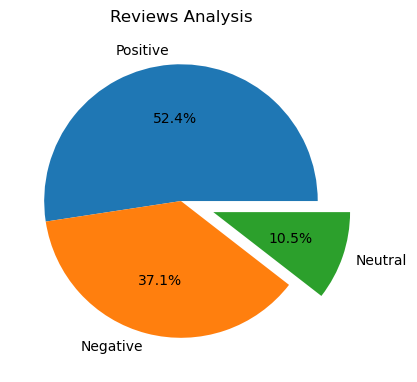

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

In [35]:
df.to_csv("BA_reviews.csv")

ModuleNotFoundError: No module named 'wordcloud'

In [38]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)

ModuleNotFoundError: No module named 'wordcloud'

In [39]:
!pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 5.5 MB/s eta 0:00:00


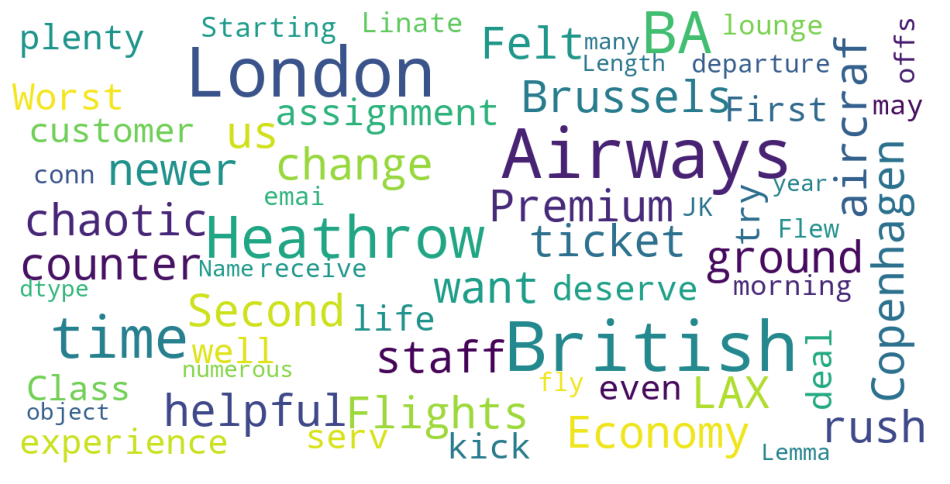

In [40]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)